In [ ]:
import calendar
import advertools as adv
import adviz
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import searchconsole
from dash_bootstrap_templates import load_figure_template
load_figure_template(['darkly', 'cosmo', 'bootstrap', 'flatly'])

In [ ]:
# client_config = 'YOUR_CONFIG_FILE.apps.googleusercontent.com.json'

In [ ]:
# account = searchconsole.authenticate(client_config=client_config)

In [ ]:
# property_url = 'https://advertools.readthedocs.io/'
# webproperty = account[property_url]

In [ ]:
# last_days = ['-'.join(['2023', str(month).zfill(2), str(calendar.monthrange(2023, month)[1])]) for month in range(1, 10)]

# query_month_reports = []

# for date in last_days:

#     temp_report = webproperty.query.range(date, months=-1).dimension('country', 'query').get()

#     tempdf = temp_report.to_dataframe().assign(date=date)
#     query_month_reports.append(tempdf)
# query_df = pd.concat(query_month_reports, ignore_index=True)
# query_df.to_csv('country_query_month.csv')

In [ ]:
# page_month_reports = []

# for date in last_days:

#     temp_report = webproperty.query.range(date, months=-1).dimension('page', 'country').get()

#     tempdf = temp_report.to_dataframe().assign(date=date)
#     page_month_reports.append(tempdf)
# page_df = pd.concat(page_month_reports, ignore_index=True)
# page_df.to_csv('page_per_month.csv')

In [ ]:
query_df = pd.read_csv('country_query_month.csv')
page_df = pd.read_csv('page_per_month.csv')

# GSC Analysis Template

#### by [@EliasDabbas](https://www.linkedin.com/in/eliasdabbas/)

## Data: monthly queries by country (clicks, impressions, ctr, position)

In [ ]:
query_df = query_df[~query_df['country'].isin(['zzz', 'xkk'])].reset_index(drop=True)
query_df

country                      query  clicks  impressions       ctr  \
0          usa                 advertools      40           60  0.666667   
1          ind                 advertools      21           35  0.600000   
2          ind  log analysis using python      17           28  0.607143   
3          gbr                 advertools      15           25  0.600000   
4          deu                 advertools      10           20  0.500000   
...        ...                        ...     ...          ...       ...   
205890     zmb             video sitemaps       0            1  0.000000   
205891     zwe               crawling seo       0            1  0.000000   
205892     zwe           download sitemap       0            1  0.000000   
205893     zwe            get sitemap xml       0            1  0.000000   
205894     zwe                seo library       0            1  0.000000   

         position        date  
0        1.016667  2023-01-31  
1        1.000000  2023-01-31  
2        1.000000  2023-01-31  
3        1.000000  2023-01-31  
4        1.000000  2023-01-31  
...           ...         ...  
205890  63.000000  2023-09-30  
205891  95.000000  2023-09-30  
205892  12.000000  2023-09-30  
205893  47.000000  2023-09-30  
205894  64.000000  2023-09-30  

[205895 rows x 7 columns]

## Monthly metrics by page and country

In [ ]:
page_df

page  \
0                                    https://advertools.readthedocs.io/   
1      https://advertools.readthedocs.io/en/master/advertools.logs.html   
2                                    https://advertools.readthedocs.io/   
3      https://advertools.readthedocs.io/en/master/advertools.logs.html   
4                                    https://advertools.readthedocs.io/   
...                                                                 ...   
24698           https://advertools.readthedocs.io/en/master/readme.html   
24699           https://advertools.readthedocs.io/en/master/readme.html   
24700           https://advertools.readthedocs.io/en/master/readme.html   
24701           https://advertools.readthedocs.io/en/master/readme.html   
24702           https://advertools.readthedocs.io/en/master/readme.html   

      country  clicks  impressions       ctr   position        date  
0         usa      51          391  0.130435  47.304348  2023-01-31  
1         ind      49          688  0.071221  21.985465  2023-01-31  
2         ind      28          108  0.259259  27.962963  2023-01-31  
3         usa      21         2350  0.008936  30.180851  2023-01-31  
4         gbr      16           53  0.301887  32.056604  2023-01-31  
...       ...     ...          ...       ...        ...         ...  
24698     tun       0            1  0.000000   1.000000  2023-09-30  
24699     tur       0            6  0.000000  16.666667  2023-09-30  
24700     twn       0            4  0.000000  42.250000  2023-09-30  
24701     ukr       0            2  0.000000   1.000000  2023-09-30  
24702     vnm       0            9  0.000000  15.333333  2023-09-30  

[24703 rows x 7 columns]

## Create interesting subsets of the data
Most frequent words 

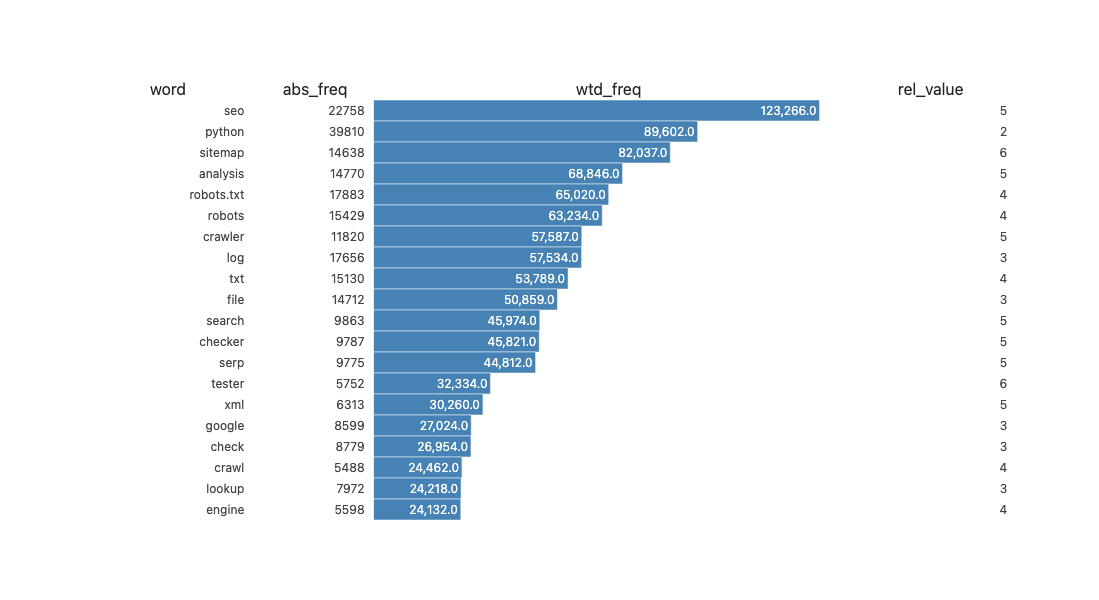

In [ ]:
top_words = adv.word_frequency(query_df['query'], query_df['impressions'])
# top_words.head(20).style.bar(subset=['wtd_freq'], color='steelblue').format({'wtd_freq': '{:,}'})

adviz.style_table(
    top_words.head(20),
    column_types=['text', 'text', 'bar', 'text'],
    column_widths=[0.15, 0.1, 0.4, 0.15],
    theme='flatly',
    width=900,
    height=600)

The `wtd_freq` column shows the total impressions of all queries containing the respective word. For example, "seo" has appeared in many different queries, the total impressions of which was 123,266.

We can now take the top words, create their respective regular expressions, and create special columns for each term.

In [ ]:
term_regex = [
    ('brand', 'advertool'),
    ('seo', 'seo'),
    ('python', 'python'),
    ('sitemap', 'sitemap|xml'),
    ('analysis', 'analy[sz]|analyt'),
    ('robots', 'robots'),
    ('crawl', 'crawl|scrap[ei]|spider'),
    ('log', '\blog(file)?'),
    ('search', 'search'),
    ('serp', 'serp'),
    ('google', 'google')
]
pd.DataFrame(term_regex, columns=['term', 'regex'])

term                   regex
0      brand               advertool
1        seo                     seo
2     python                  python
3    sitemap             sitemap|xml
4   analysis        analy[sz]|analyt
5     robots                  robots
6      crawl  crawl|scrap[ei]|spider
7        log             log(file)?
8     search                  search
9       serp                    serp
10    google                  google

In [ ]:
for term, regex in term_regex:
    query_df[f'{term}_term'] = query_df['query'].str.contains(regex, regex=True)
query_df.filter(regex='^query$|_term$').head().style.background_gradient()

### Top terms/topics across all queries

In [ ]:
(query_df
 .filter(regex='_term')
 .mean()
 .sort_values(ascending=False)
 .to_frame()
 .rename(columns={0: '%'})
 .style
 .format('{:.1%}')
 .bar(color='steelblue'))

### Convert average positions to SERP page

In [ ]:
query_df['serp_page'] = query_df['position'].div(10).astype(int).add(1)
query_df.sample(10)[['query', 'position', 'serp_page']].reset_index(drop=True)

query   position  serp_page
0                     get emoji  52.333333          6
1            python web crawler  80.500000          9
2                  sitemaps.xml  29.250000          3
3               test robots txt  23.000000          3
4          unicode emoji search  37.000000          4
5  how to print emoji in python  42.000000          5
6     search engine 1000 videos  21.000000          3
7             stop words in nlp  51.000000          6
8              url list checker  46.000000          5
9                 serps com api  82.000000          9

In [ ]:
month_country_ranks = pd.pivot_table(query_df, index=['date', 'country'], values=['clicks', 'impressions'], aggfunc='sum').reset_index()
month_country_ranks['monthly_rank_clicks'] = month_country_ranks.groupby('date')['clicks'].rank(ascending=False)
month_country_ranks['flag'] = [adviz.flag(cc) for cc in month_country_ranks['country']]
# month_country_ranks.head()

In [ ]:
monthly_impressions = pd.pivot_table(query_df, index=['date', 'country'], values='impressions', aggfunc='sum').reset_index()
monthly_impressions['flag'] = [adviz.flag(cc) for cc in monthly_impressions['country']]
# monthly_impressions

In [ ]:
top20_countries = pd.pivot_table(monthly_impressions, index='country', values='impressions', aggfunc='sum').sort_values('impressions', ascending=False).head(20).index

All reports and charts are made using the full dataset. You can easily use any subset based on available and newly-created columns/criteria

In [ ]:
# examples
# brand = query_df[query_df['brand_term']]
# non_brand = query_df[~query_df['brand_term']]
# crawl_queries = query_df[query_df['crawl_term']]
# python_queries = query_df[query_df['python_term']]

# etc...

## Country comparison (monthly impressions)

* Click a flag(s) to add/remove countrie(s)

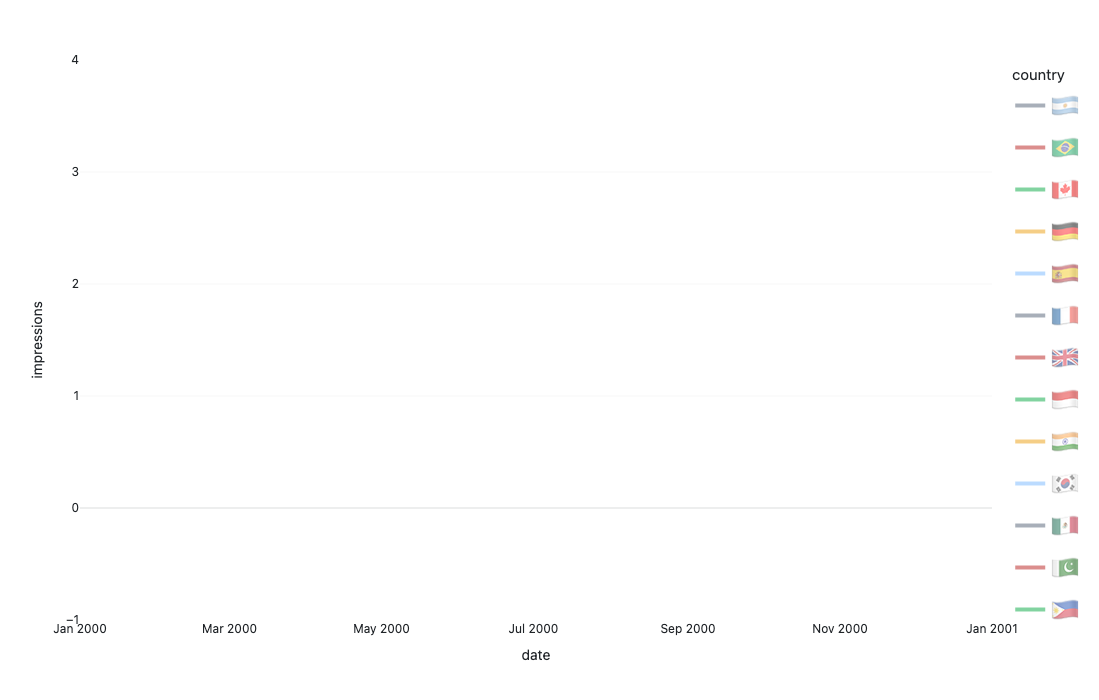

In [ ]:
fig = px.line(
    monthly_impressions[monthly_impressions['country'].isin(top20_countries)],
    x='date',
    y='impressions',
    color='flag',
    template='flatly',
    height=700,
    hover_name='country')
fig.layout.legend.title.text = 'country'
for trace in fig.data:
    trace.visible = 'legendonly'
    trace.line.width = 4
fig.layout.legend.font.size = 30
fig.layout.legend.title.font.size = 15
fig.layout.hovermode = 'x unified'
fig.layout.hoverlabel.font.size = 15
fig.layout.xaxis.showgrid = False
# fig.layout.yaxis.showgrid = False
fig

## Weighted word frequency - monthly (clicks)

* Total clicks for all keywords containing \<word>.
* e.g.: in January, keywords containing "python" received a total of 323 clicks

In [ ]:
word_freq_dfs = []

for month in query_df['date'].drop_duplicates():
    tempdf = query_df[query_df['date'].eq(month)]
    query_metric = pd.pivot_table(tempdf, index='query', values='clicks', aggfunc='sum').reset_index()
    word_freq_df = adv.word_frequency(query_metric['query'], query_metric['clicks']).head(20)[['word', 'wtd_freq']]
    word_freq_df.insert(0, 'date', tempdf['date'].iloc[0])
    word_freq_dfs.append(word_freq_df)
word_freq_click = pd.concat(word_freq_dfs)

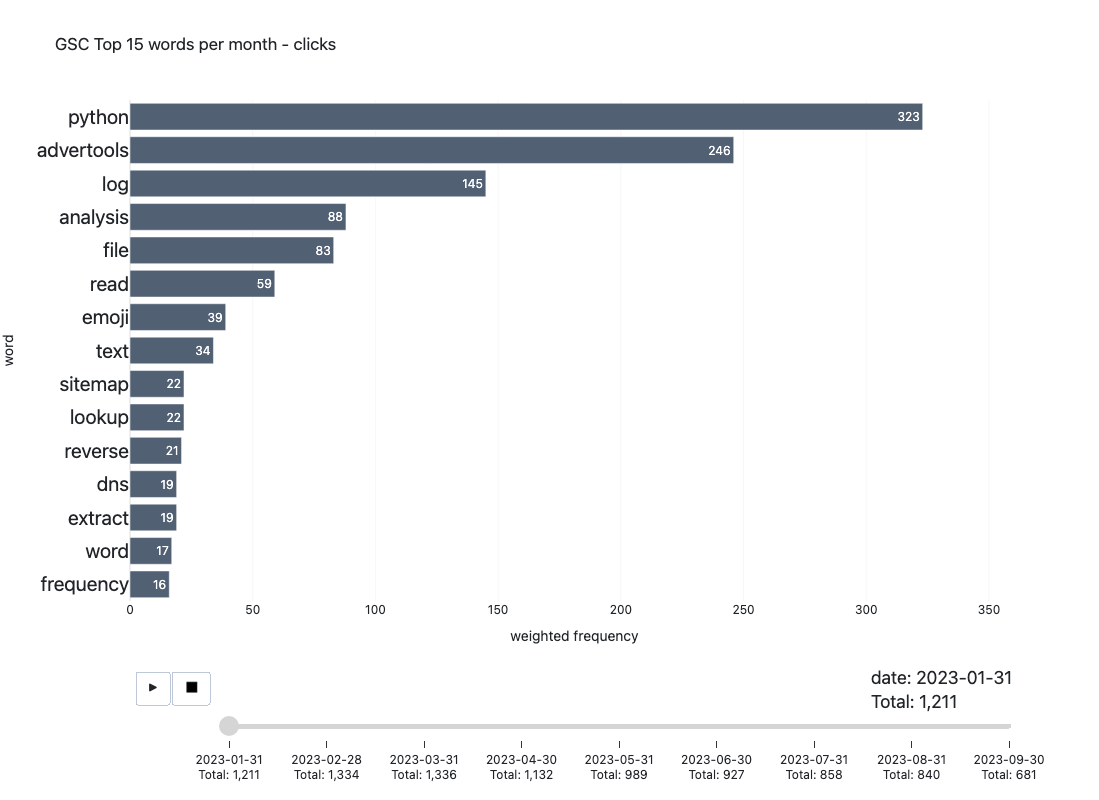

In [ ]:
n = 15
fig = adviz.racing_chart(
    word_freq_click[['word', 'wtd_freq', 'date']],
    n=n,
    height=800,
    title=f'GSC Top {n} words per month - clicks',
    theme='flatly')
fig.layout.yaxis.tickfont.size = 20
# for frame in fig.frames:
#     frame.data[0].marker.color = 'snow'
# fig.data[0].marker.color = 'snow'
fig.layout.xaxis.title = 'weighted frequency'
fig

## Weighted bigram frequency - monthly (clicks)

In [ ]:
word_freq_dfs_bi = []

for month in query_df['date'].drop_duplicates():
    tempdf = query_df[query_df['date'].eq(month) ]
    query_metric = pd.pivot_table(tempdf, index='query', values='clicks', aggfunc='sum').reset_index()
    word_freq_df = adv.word_frequency(query_metric['query'], query_metric['clicks'], phrase_len=2).head(20)[['word', 'wtd_freq']]
    word_freq_df.insert(0, 'date', tempdf['date'].iloc[0])
    word_freq_dfs_bi.append(word_freq_df)
word_freq_clicks_bi = pd.concat(word_freq_dfs_bi)

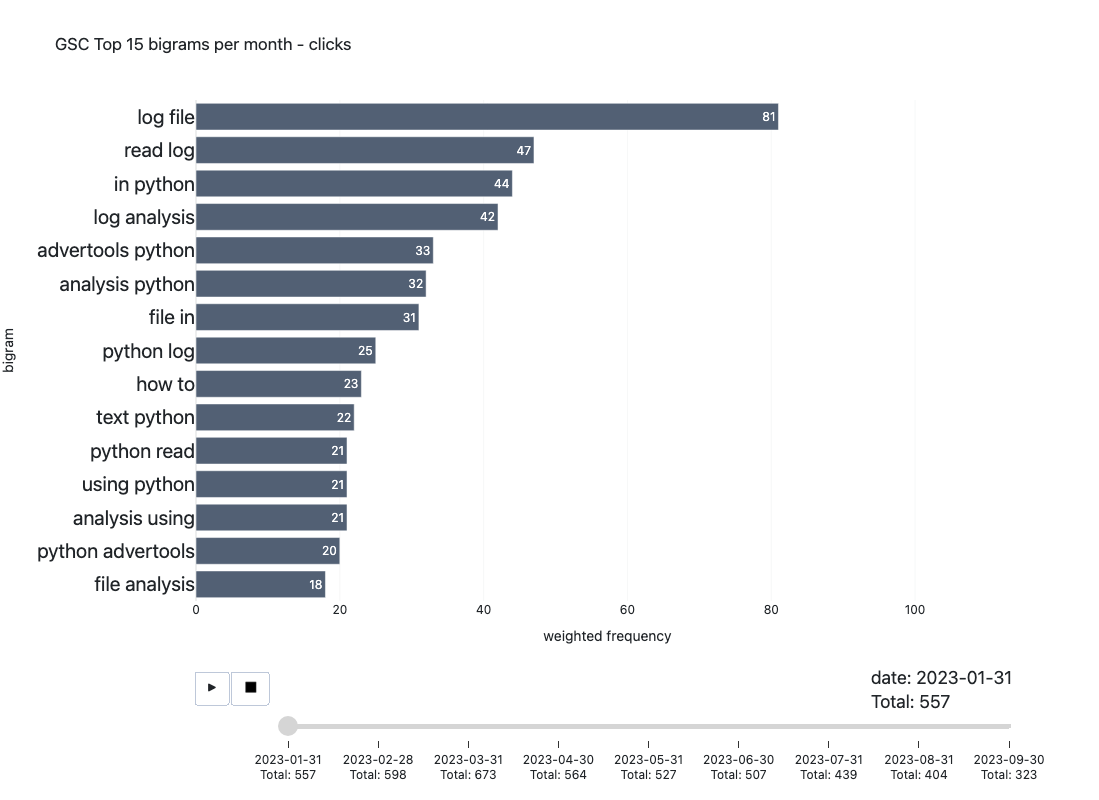

In [ ]:
n = 15
fig = adviz.racing_chart(
    word_freq_clicks_bi[['word', 'wtd_freq', 'date']],
    n=n,
    height=800,
    title=f'GSC Top {n} bigrams per month - clicks',
    theme='flatly')
fig.layout.yaxis.tickfont.size = 20
# for frame in fig.frames:
#     frame.data[0].marker.color = 'snow'
# fig.data[0].marker.color = 'snow'
fig.layout.yaxis.title = 'bigram'
fig.layout.xaxis.title = 'weighted frequency'
fig

In [ ]:
# default_linewidth = 0.5
# highlighted_linewidth_delta = 2

# def update_trace(trace, points, selector):
#     if len(points.point_inds) == 0:
#         return
#     for i,_ in enumerate(fig.data):
#         fig.data[i]['line']['width'] = 4
#         fig.data[i]['line']['color'] = 'red'
#         # fig.data[i]['line']['width'] = default_linewidth + highlighted_linewidth_delta * (i == points.trace_index)


# fig = go.Figure()
# for country in monthly_impressions['country'].drop_duplicates():
#     tempdf = monthly_impressions[monthly_impressions['country'].eq(country)]
#     fig.add_scatter(
#         x=tempdf['date'],
#         y=tempdf['impressions'],
#         name=tempdf['flag'].iloc[0],
#         hoverlabel={'bgcolor': 'red'},
#         mode='lines+markers',
#         line={'width': 0.5},
#         marker={
#             'color': 'gray', 'opacity': 0.01,
#         })
# fig.layout.height = 700
# # fig.layout.yaxis.type = 'log'

# def hover_fn(trace):
#     trace.color = 'red'

# for i in range(len(fig.data)):
#     fig.data[i].on_click(hover_fn)

# fig

## Racing chart - impressions

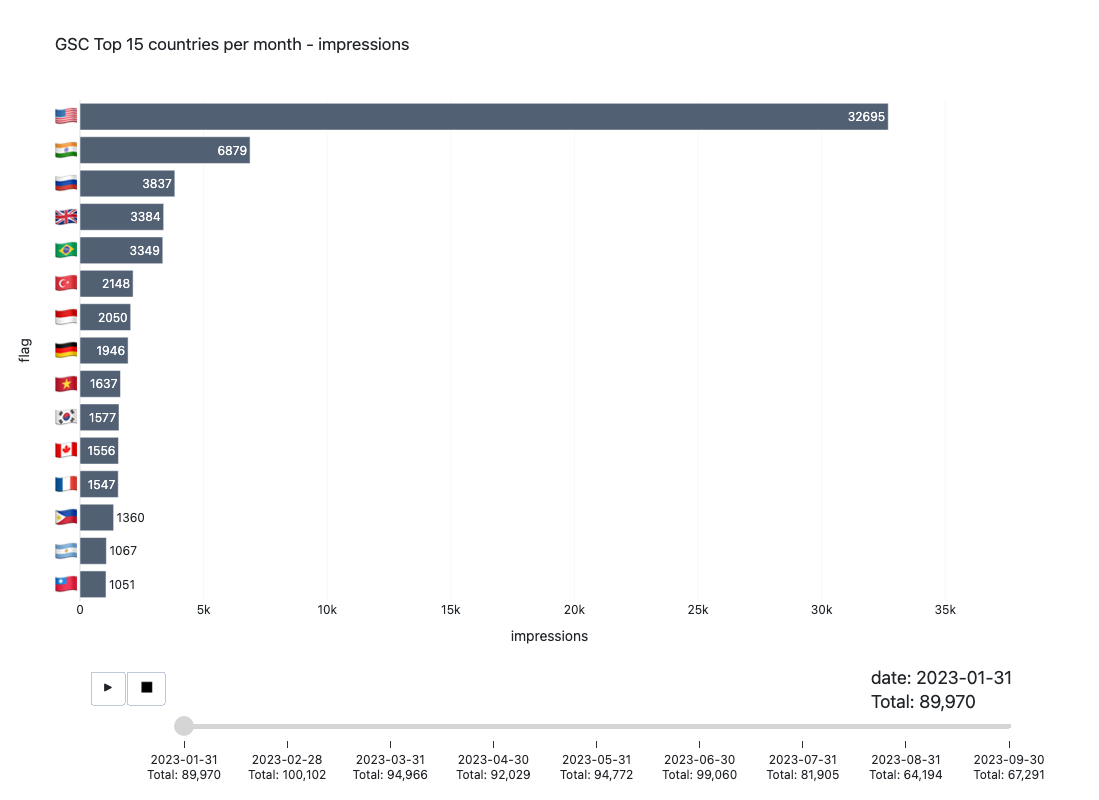

In [ ]:
n = 15
fig = adviz.racing_chart(
    month_country_ranks[['flag', 'impressions', 'date']],
    n=n,
    height=800,
    # width=900,
    title=f'GSC Top {n} countries per month - impressions',
    theme='flatly')
fig.layout.yaxis.tickfont.size = 25
# for frame in fig.frames:
#     frame.data[0].marker.color = 'snow'
# fig.data[0].marker.color = 'snow'
fig

## Monthly impressions - map

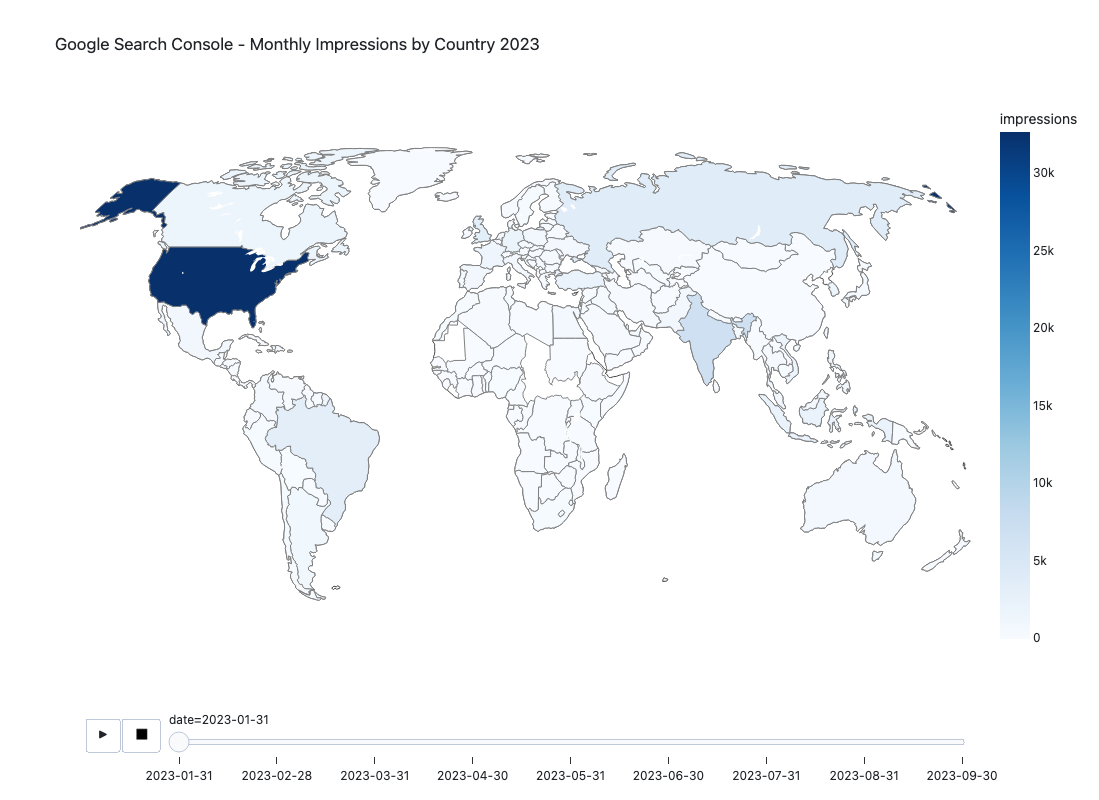

In [ ]:
fig = px.choropleth(
    month_country_ranks,
    color='impressions',
    locations=month_country_ranks['country'].str.upper(),
    animation_frame='date',
    hover_name='flag',
    template='flatly',
    title='Google Search Console - Monthly Impressions by Country 2023',
    projection='natural earth',
    color_continuous_scale='blues',
    height=800)
fig.layout.geo.showframe = False
fig.layout.geo.lataxis.range = [-53, 76]
fig.layout.geo.lonaxis.range = [-137, 168]
fig.data[0].marker.line.color = 'gray'
fig

## Racing chart - clicks

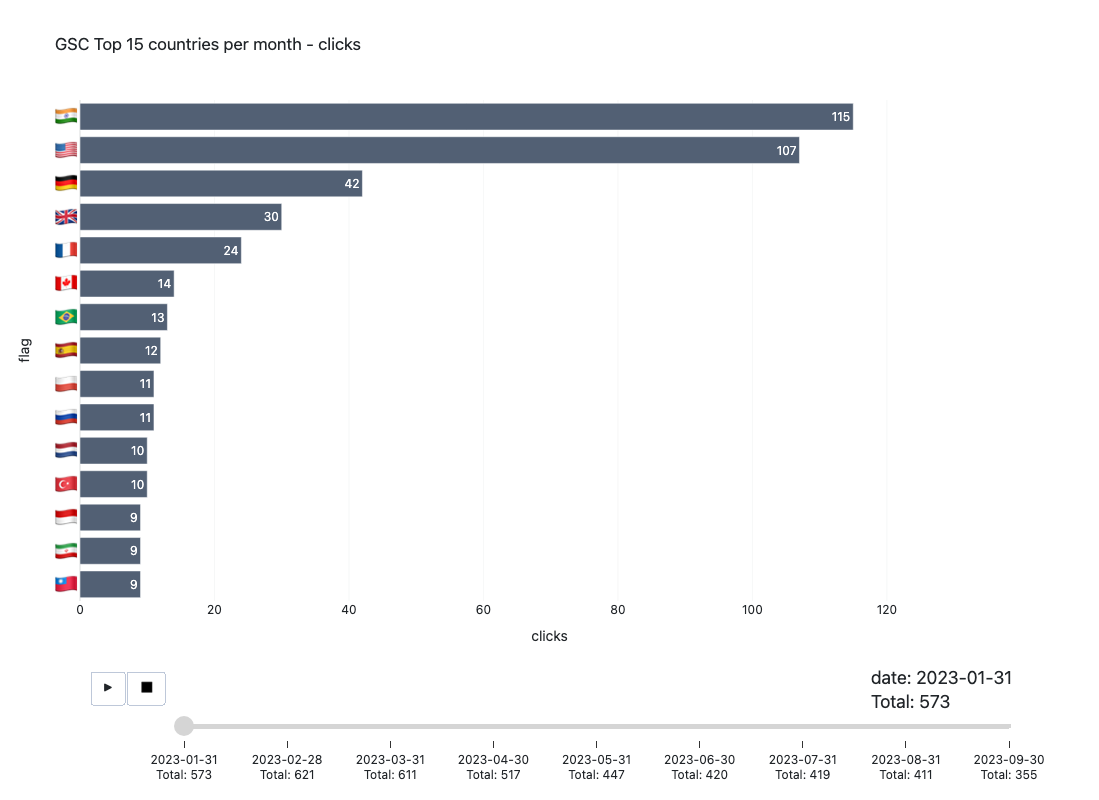

In [ ]:
n = 15
fig = adviz.racing_chart(
    month_country_ranks[['flag', 'clicks', 'date']],
    n=n,
    height=800,
    title=f'GSC Top {n} countries per month - clicks',
    theme='flatly')
fig.layout.yaxis.tickfont.size = 25
# for frame in fig.frames:
#     frame.data[0].marker.color = 'snow'
# fig.data[0].marker.color = 'snow'
fig

## Monthly clicks - map

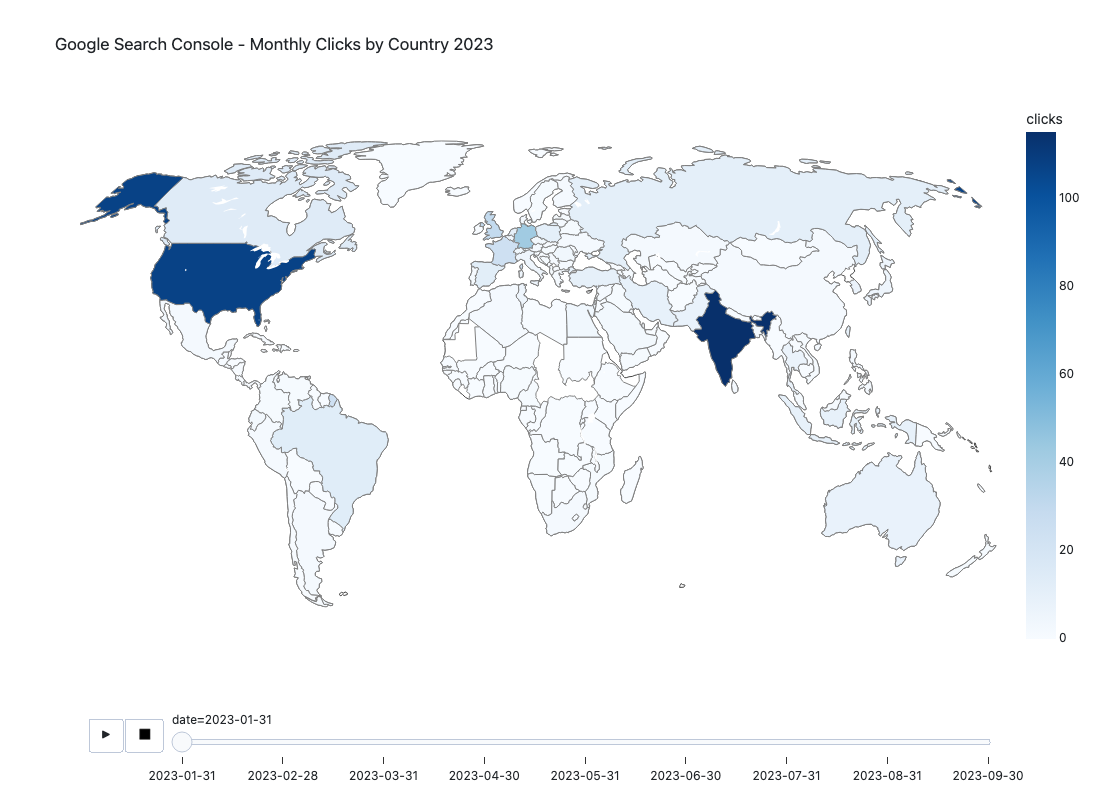

In [ ]:
fig = px.choropleth(
    month_country_ranks,
    color='clicks',
    locations=month_country_ranks['country'].str.upper(),
    animation_frame='date',
    hover_name='flag',
    template='flatly',
    title='Google Search Console - Monthly Clicks by Country 2023',
    projection='natural earth',
    color_continuous_scale='blues',
    height=800)
fig.layout.geo.showframe = False
fig.layout.geo.lataxis.range = [-53, 76]
fig.layout.geo.lonaxis.range = [-137, 168]
fig.data[0].marker.line.color = 'gray'
fig

## Monthly impressions ~ clicks by country

* Zoom in to any part of the chart to focus on a certain set of countries (simply drag your mouse across the region/flags of interest)

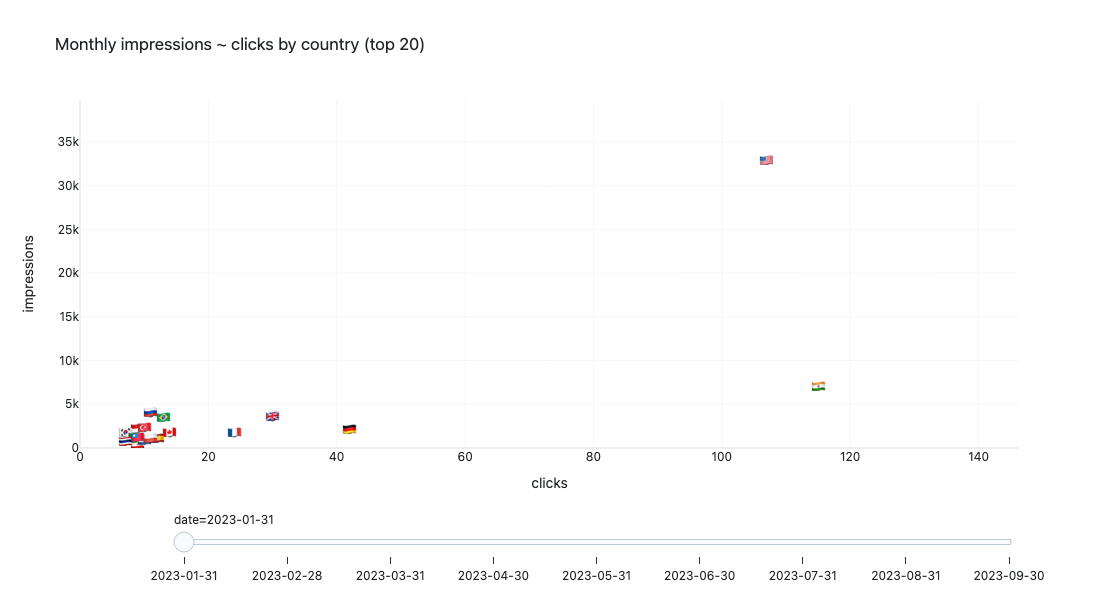

In [ ]:
df = month_country_ranks[month_country_ranks['monthly_rank_clicks'].lt(21)]
fig = px.scatter(
    df,
    x='clicks',
    y='impressions',
    animation_frame='date',
    title='Monthly impressions ~ clicks by country (top 20)',
    text='flag',
    template='flatly',
    range_x=(0, df['clicks'].max() * 1.1),
    range_y=(0, df['impressions'].max() * 1.1),
    height=600
)
for frame in fig.frames:
    frame.data[0].textfont.size = 30
fig.frames[0].data[0].textfont.size = 30
for button in fig.layout.updatemenus[0].buttons:
    button.visible = False
fig

In [ ]:
imp_clicks = pd.DataFrame({
    'impressions': query_df.groupby('date')['impressions'].sum(),
    'clicks': query_df.groupby('date')['clicks'].sum(),
}).reset_index().assign(ctr=lambda df: df['clicks'].div(df['impressions']))
imp_clicks['count'] = pd.pivot_table(query_df, index='date', values='impressions', aggfunc='count')['impressions'].rename('count').tolist()


In [ ]:
url_dir_df = adv.url_to_df(page_df['page']).filter(regex='dir_|last_dir')
page_url_df = pd.concat([page_df, url_dir_df], axis=1)
monthly_page_imp = pd.pivot_table(page_url_df, index=['date','last_dir'], values='impressions', aggfunc='sum').reset_index()
monthly_page_imp['last_dir'] = monthly_page_imp['last_dir'].str.replace('\.html$', '', regex=True)

## Top pages monthly (impressions)
* This chart can be much more useful with larger sites (this one has only ~50 pages)
* Having URLs split, we can see how segments' traffic have evoleved over time `dir_1`, `dir_2`, or any combination

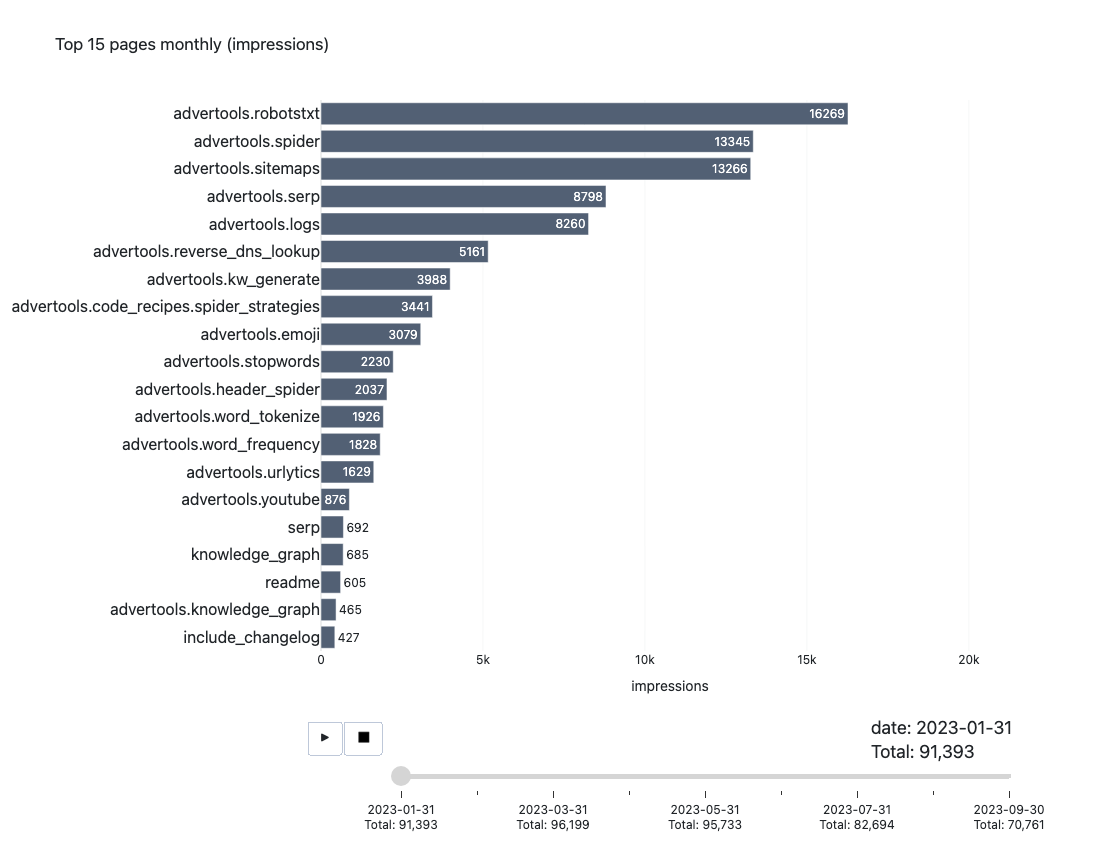

In [ ]:
fig = adviz.racing_chart(
    monthly_page_imp[['last_dir', 'impressions', 'date']],
    n=20,
    title='Top 15 pages monthly (impressions)',
    height=850, theme='flatly')
fig.layout.margin.l = 200
fig.layout.yaxis.title = None
fig.layout.yaxis.tickfont.size = 16
fig

## Query count - monthly

In [ ]:
# query_count = pd.pivot_table(query_df, index='date', values='query', aggfunc='count').reset_index()

In [ ]:
query_count = pd.pivot_table(
    query_df,
    index='date',
    values='query',
    aggfunc=pd.Series.nunique).reset_index()

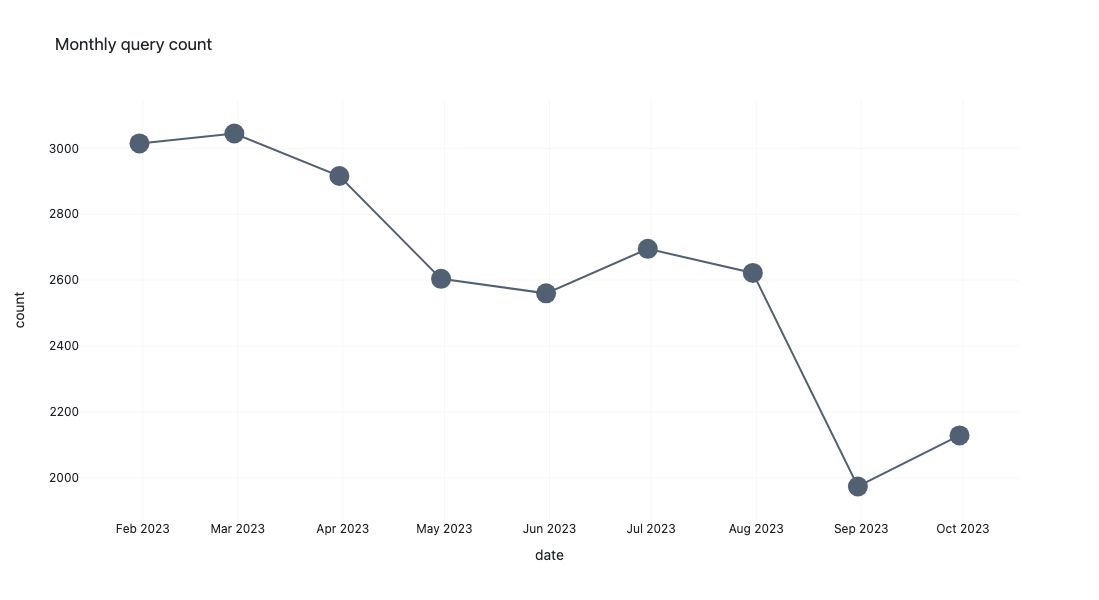

In [ ]:
fig = px.line(
    query_count,
    x='date',
    y='query',
    markers=True,
    template='flatly',
    height=600,
    title='Monthly query count')
fig.data[0].marker.size = 20
fig.layout.yaxis.title = 'count'

fig

## URL count - monthly

In [ ]:
page_count = pd.pivot_table(
    page_df,
    index='date',
    values='page',
    aggfunc=pd.Series.nunique).reset_index()

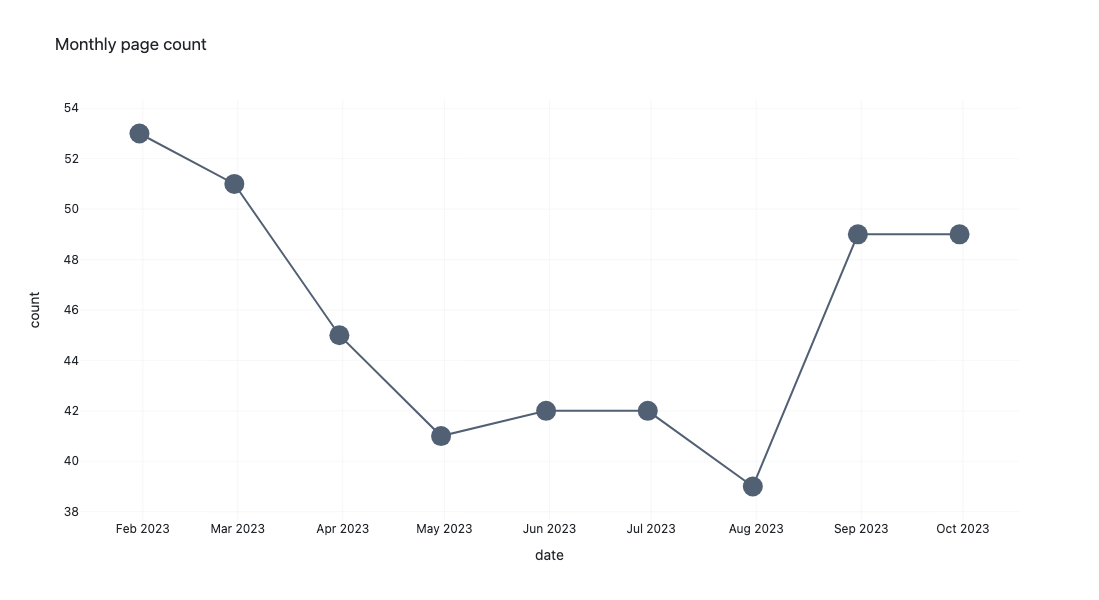

In [ ]:
fig = px.line(
    page_count,
    x='date',
    y='page',
    markers=True,
    height=600,
    template='flatly',
    title='Monthly page count')
fig.data[0].marker.size = 20
fig.layout.yaxis.title = 'count'

fig


## Correlation matrix

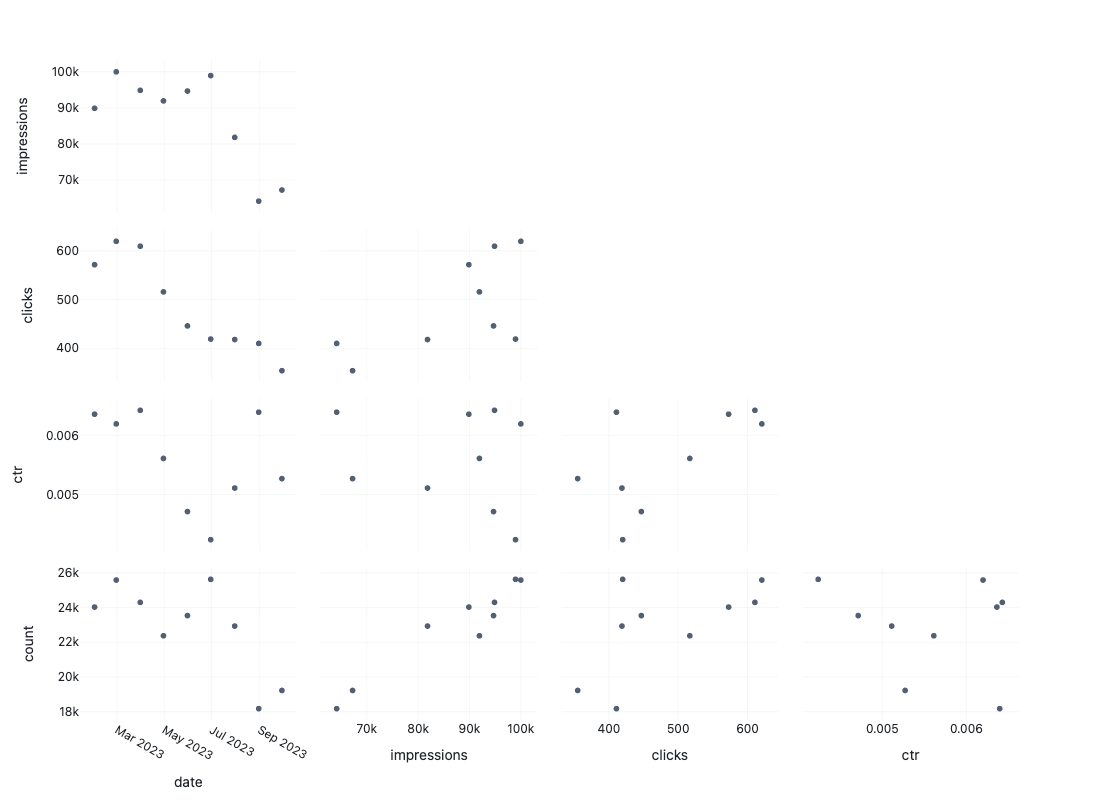

In [ ]:
fig = px.scatter_matrix(imp_clicks, height=800, template='flatly')
fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig